<a href="https://colab.research.google.com/github/marybaron/Intro-to-Machine-Learning/blob/main/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 7 - Mary Baron

# 16.1 Image Recognition: The Fashion-MNIST Dataset:
Keras comes bundled with the Fashion-MNIST database of fashion articles which, like the MNIST digits dataset, provides 28-by-28 grayscale images. Fashion-MNIST contains clothing-article images labeled in 10 categories—0 (T-shirt/top), 1 (Trouser), 2 (Pullover), 3 (Dress), 4 (Coat), 5 (Sandal), 6 (Shirt), 7 (Sneaker), 8 (Bag), 9 (Ankle boot)—with 60,000 training samples and 10,000 testing samples. Modify this chapter’s convnet example to load and process Fashion-MNIST rather than MNIST—this requires simply importing the correct module, loading the data then running the model with these images and labels, then re-run the entire example. 

Answer:


*   How well does the model perform on Fashion-MNIST compared to MNIST?

    The model preforms at a 88.8% accuracy with a 32.7% loss on the Fashion-MNIST in comparision to the MNIST which preforms at a 99.1% accuracy with only a 2.6% loss.
*   How do the training times compare? 

    For the MNIST training times it averaged around 105s 124ms and on the Fashion-MNIST the training times averaged around 114s 135ms. The training times slighty changed a few times but each time the MNIST training times where faster.



**MNIST:**

    Epoch 1/5: 107s 126ms

    Epoch 2/5: 105s 124m

    Epoch 3/5: 105s 125ms

    Epoch 4/5: 104s 124ms

    Epoch 5/5: 104s 124ms

**Fashion-MNIST:**

    Epoch 1/5: 117s 137ms

    Epoch 2/5: 114s 135ms

    Epoch 3/5: 114s 135ms

    Epoch 4/5: 114s 135ms

    Epoch 5/5: 114s 135ms





**Load the dataset:**

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

**Explore the Data:**

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_test.shape

(10000, 28, 28)

In [9]:
y_test.shape

(10000,)

**Vizualizing the Data:**

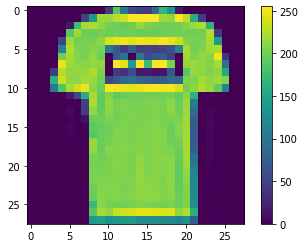

In [10]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

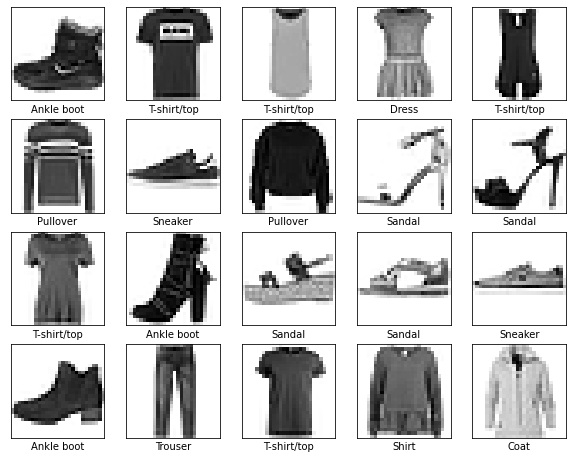

In [11]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Data Preparation:**

In [12]:
X_train = X_train.reshape((60000, 28, 28, 1)) 

In [13]:
X_train.shape

(60000, 28, 28, 1)

In [14]:
X_test = X_test.reshape((10000, 28, 28, 1))

In [15]:
X_test.shape

(10000, 28, 28, 1)

**Creating the Convolutional Neural Network(CNN):**

In [16]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D 

In [17]:
cnnModel = Sequential()

**Convolution Layer:**

In [18]:
cnnModel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                 input_shape=(28,28,1)))

**Pooling Layer:**

In [19]:
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

*   **Adding Another Pooling Layer and Convolutional Layer:**






In [20]:
cnnModel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))

In [21]:
cnnModel.add(MaxPooling2D(pool_size=(2, 2)))

**Flatten:**

In [22]:
cnnModel.add(Flatten())

**Dense Layer:**

In [23]:
cnnModel.add(Dense(units=128, activation='relu'))



*   **Adding another Dense Layer**



In [24]:
cnnModel.add(Dense(units=10, activation='softmax'))

**Model Summary:**

In [25]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

**Vizualizing the Structure of the Model:**

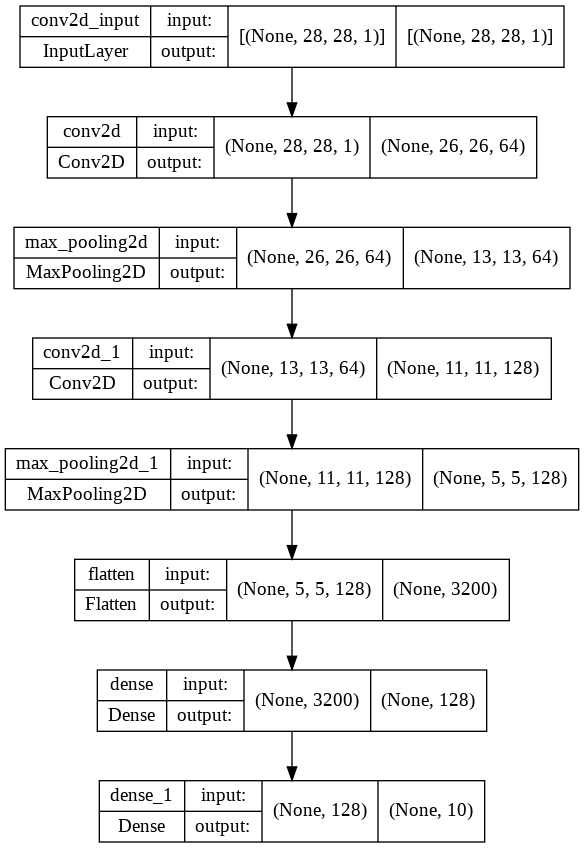

In [26]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnnModel, to_file='convnet.png', show_shapes=True, 
           show_layer_names=True)
Image(filename='convnet.png')

**Compiling the model:**

In [27]:
cnnModel.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Trainging and Evaluating the Model:**

In [28]:
cnnModel.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


844/844 [==============================] - 117s 137ms/step - loss: 0.8820 - accuracy: 0.8272 - val_loss: 0.3430 - val_accuracy: 0.8785
Epoch 2/5
844/844 [==============================] - 114s 135ms/step - loss: 0.3267 - accuracy: 0.8805 - val_loss: 0.3127 - val_accuracy: 0.8907
Epoch 3/5
844/844 [==============================] - 114s 135ms/step - loss: 0.2858 - accuracy: 0.8936 - val_loss: 0.2968 - val_accuracy: 0.8923
Epoch 4/5
844/844 [==============================] - 114s 135ms/step - loss: 0.2586 - accuracy: 0.9024 - val_loss: 0.2939 - val_accuracy: 0.8967
Epoch 5/5
844/844 [==============================] - 114s 135ms/step - loss: 0.2409 - accuracy: 0.9091 - val_loss: 0.3076 - val_accuracy: 0.8917


In [29]:
loss, accuracy = cnnModel.evaluate(X_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.3277 - accuracy: 0.8816


In [30]:
loss

0.32771041989326477

In [31]:
accuracy

0.881600022315979

**Predictions:**

In [32]:
predictions = cnnModel.predict(X_test)

In [33]:
y_test[0]

9

In [34]:
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000000238%
1: 0.0000001003%
2: 0.0000004276%
3: 0.0000000061%
4: 0.0000000318%
5: 0.0075150689%
6: 0.0000000240%
7: 0.0835823535%
8: 0.0000004086%
9: 99.9089002609%


**Incorrect predictions:**

In [35]:
images = X_test.reshape((10000, 28, 28))

In [36]:
incorrect_predictions = []

In [37]:
for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:  
        incorrect_predictions.append(
            (i, images[i], predicted, expected))

In [38]:
len(incorrect_predictions)

9174

**Vizualizing the Incorrect Predictions:**

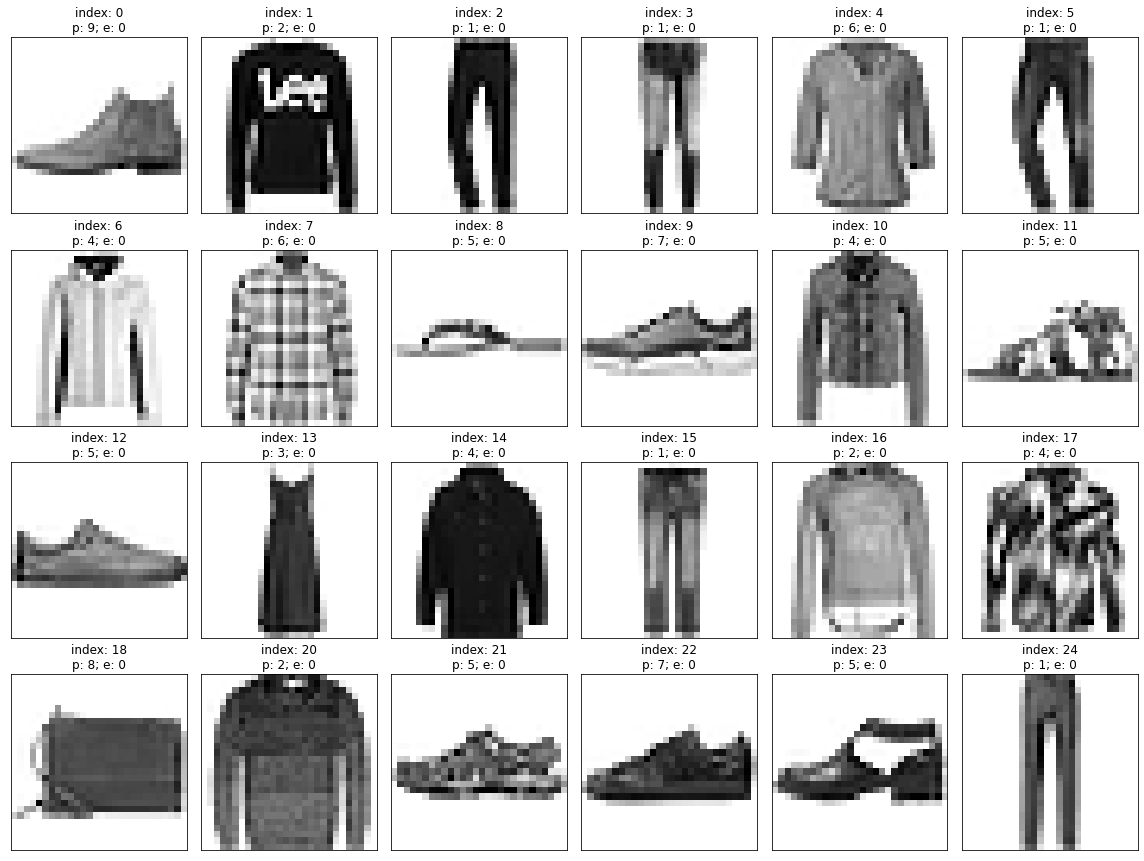

In [39]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([])  
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()

**Saving and Loading the Model:**

In [40]:
cnnModel.save('fashion_mnist_cnn_model.h5')

In [41]:
from tensorflow.keras.models import load_model
cnn = load_model('fashion_mnist_cnn_model.h5')

#16.4 Convnet Layers:
Remove the first Dense layer in this chapter’s convnet model. How does this change the prediction accuracy? Several Keras pretrained convnets contain Dense layers with 4096 neurons. Add such a layer before the two Dense layers in this chapter’s convnet model. 

Answer:

*   How does this change the prediction accuracy? 

    By removing the first Dense layer in this chapter’s convnet model, it changes the prediction accuracy from 0.9919999837875366 to 0.9897000193595886.

